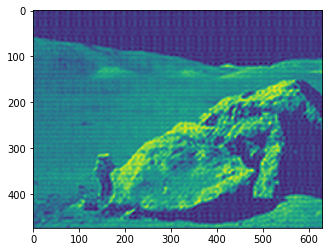

In [2]:
#Exercise: Denoise moon landing image
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

img = plt.imread("http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/moonlanding.png")
img_ft = fftpack.fft2(img, axes=(0, 1))
keep_fraction = 0.1
img_ft2 = img_ft.copy()
r, c = img_ft2.shape
img_ft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
img_ft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
img_new = fftpack.ifft2(img_ft2).real

plt.imshow(img_new)
plt.show()



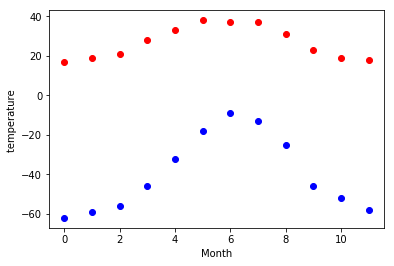

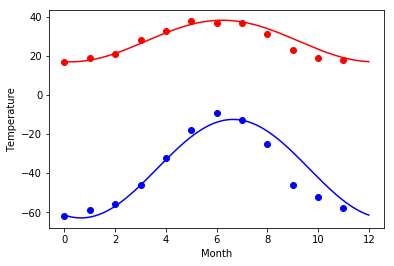

In [3]:
#Exercise: Curve fitting of temperature data
from scipy import optimize

temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('temperature ')
def f(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(f, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(f, months,
                                      temp_min, [-40, 20, 0])
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, f(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, f(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 4
         Gradient evaluations: 1


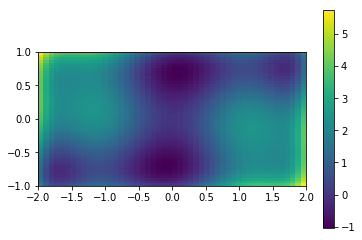

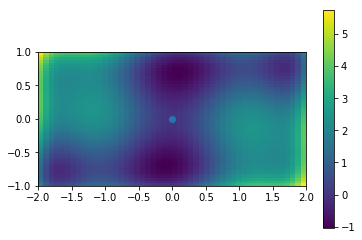

In [4]:
#Exercise: 2-D minimization
def sixhump(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + \
        4*x[1]**2) * x[1] **2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)
plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()

x_min = optimize.fmin_bfgs(sixhump, (0, 0) )

plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()
plt.scatter(x_min[0], x_min[1])

plt.show()



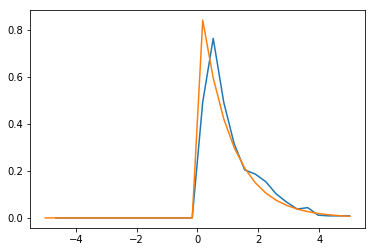

In [53]:
#Exercise: Probability distributions
from scipy import stats
a=np.random.gamma(1,size=1000)
bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(a, bins=bins, normed=True)
b = stats.gamma.pdf( bins,1 )
plt.plot(bins[1:], histogram)
plt.plot(bins, b)


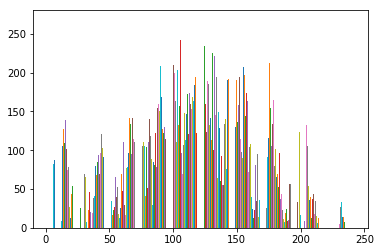

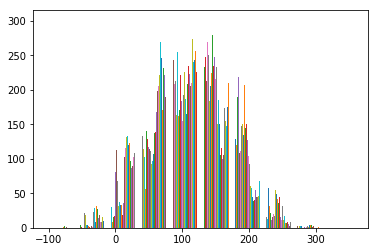

In [76]:
# Compare histograms for the different filtered images.
"""Unfortunately lena left us in some previous pathces of misc sublibrary, so I had to use misc.face"""
from scipy import misc
from scipy import ndimage
from scipy import signal
face = misc.face(gray=True)
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std()*0.5*np.random.standard_normal(face.shape)
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(blurred_face, size=5)
wiener_face = signal.wiener(blurred_face, (5,5))

plt.hist(median_face)
plt.figure()
plt.hist(noisy_face)
plt.figure()
plt.hist(blurred_face)
plt.figure()
plt.hist(wiener_face)
plt.show()

In [89]:
#Check that opening amounts to eroding, then dilating.
a = np.zeros((7,7), dtype=np.int)
a[1:5, 1:5] = 1; a[5, 5] = 1; a[0,0]=1
print(ndimage.binary_opening(a).astype(np.int))
b=ndimage.binary_erosion(a).astype(a.dtype)
b=ndimage.binary_dilation(b).astype(a.dtype)
print(b)

[[0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0]
 [0 1 1 1 1 0 0]
 [0 1 1 1 1 0 0]
 [0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0]
 [0 1 1 1 1 0 0]
 [0 1 1 1 1 0 0]
 [0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [91]:
#Exercise Check that the area of the reconstructed square is smaller than the area of the initial square. 
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25*np.random.standard_normal(a.shape)
mask = a>=0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)
initialarea=30*30
initialarea-np.sum(closed_mask)

13